In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import kagglehub

In [ ]:
# Download the dataset
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print("Path to dataset files:", path)

train_dir = os.path.join(path, 'chest_xray', 'train')
val_dir = os.path.join(path, 'chest_xray', 'val')
test_dir = os.path.join(path, 'chest_xray', 'test')

def preprocess_image(image):
    return image / 255.0

In [ ]:
# Data generators
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_image,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_image)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_image)

In [ ]:
# Load images
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)

# Function to count images per class
def count_images_per_class(directory):
    class_counts = {}
    for class_dir in os.listdir(directory):
        class_path = os.path.join(directory, class_dir)
        class_counts[class_dir] = len(os.listdir(class_path))
    return class_counts

In [ ]:
# Plot pie chart
def plot_pie_chart(counts, title):
    labels = counts.keys()
    sizes = counts.values()
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
    plt.title(title)
    plt.axis('equal')
    plt.show()

# Count images and plot pie chart for train, validation, and test sets
train_counts = count_images_per_class(train_dir)
val_counts = count_images_per_class(val_dir)
test_counts = count_images_per_class(test_dir)

plot_pie_chart(train_counts, "Train Set Distribution")
plot_pie_chart(val_counts, "Validation Set Distribution")
plot_pie_chart(test_counts, "Test Set Distribution")

# Load pre-trained MobileNetV2
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

In [ ]:
# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=10, verbose=1)

In [ ]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

In [ ]:
# Predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

In [ ]:
# Classification report
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

In [ ]:
# ROC-AUC score
roc_auc = roc_auc_score(y_true, y_pred[:, 1])
print(f"ROC-AUC Score: {roc_auc}")

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

Path to dataset files: C:\Users\Moon-Study\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\versions\2
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


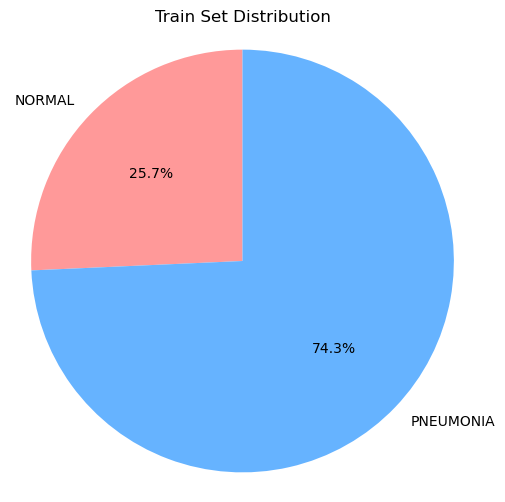

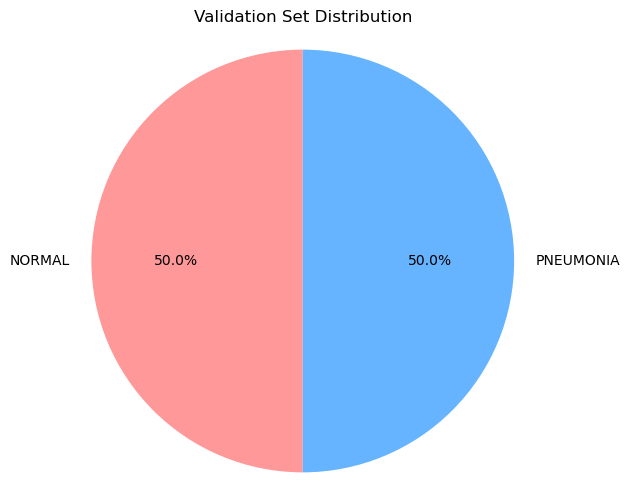

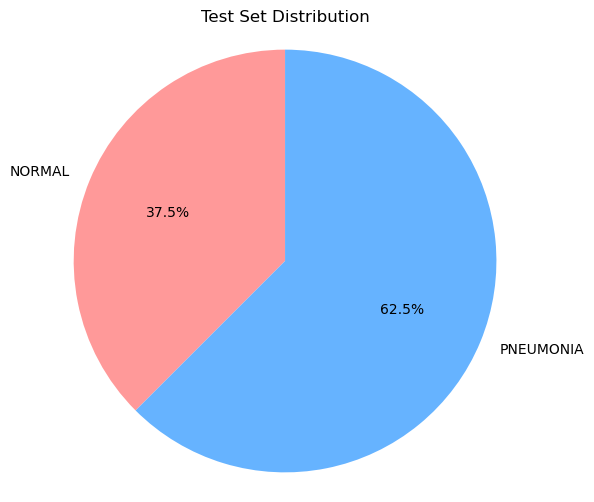

C:\Users\Moon-Study\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 311s 2s/step - accuracy: 0.8118 - loss: 0.4211 - val_accuracy: 0.7500 - val_loss: 0.3045
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 298s 2s/step - accuracy: 0.8995 - loss: 0.2398 - val_accuracy: 0.8125 - val_loss: 0.2888
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.9099 - loss: 0.2028 - val_accuracy: 0.8750 - val_loss: 0.2421
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.9212 - loss: 0.1895 - val_accuracy: 0.8750 - val_loss: 0.2769
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 299s 2s/step - accuracy: 0.9159 - loss: 0.1889 - val_accuracy: 1.0000 - val_loss: 0.2542
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 290s 2s/step - accuracy: 0.9245 - loss: 0.1820 - val_accuracy: 1.0000 - val_loss: 0.2397
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.9264 - loss: 0.1849 - val_accuracy: 0.8125 - val_loss: 0.2966
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.9245 - loss: 0.1837 - val_accu

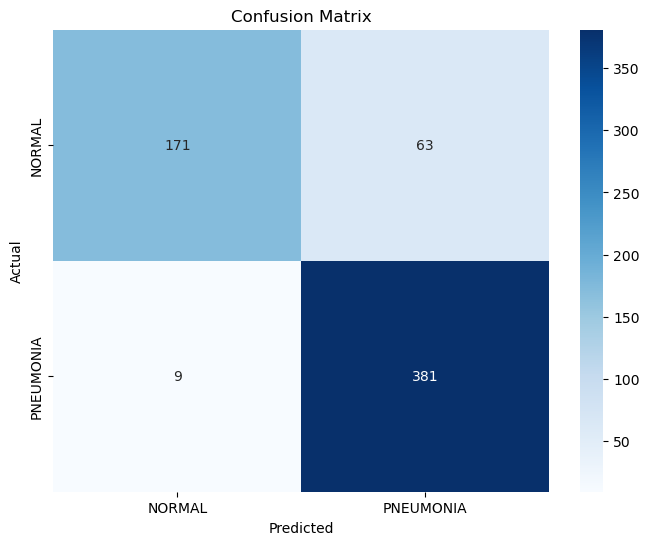

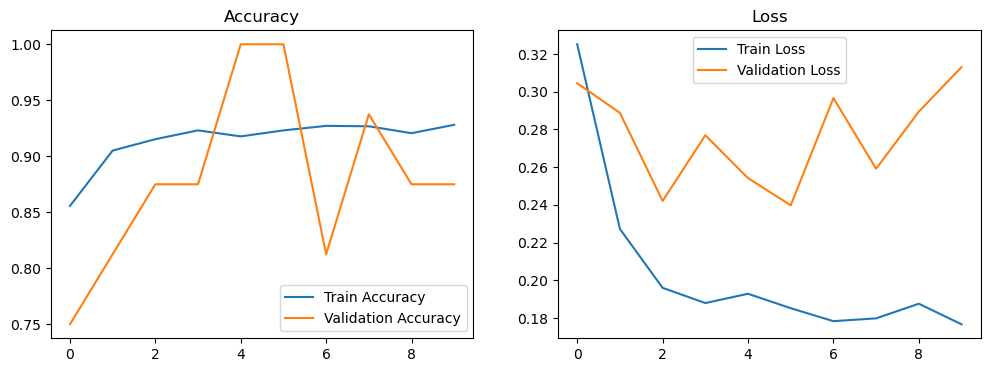

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


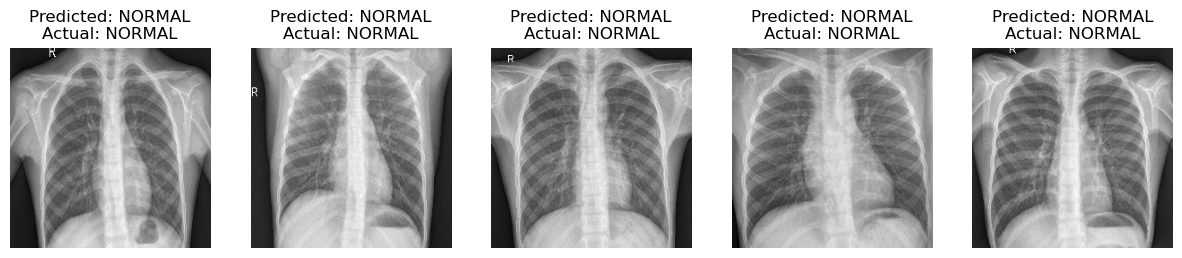

In [ ]:
# Display sample images with predictions
def plot_sample_images(generator, model, class_labels, n_samples=5):
    sample_images, sample_labels = next(generator)
    predictions = model.predict(sample_images)
    pred_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(sample_labels, axis=1)

    plt.figure(figsize=(15, n_samples * 3))
    for i in range(n_samples):
        plt.subplot(1, n_samples, i + 1)
        plt.imshow(sample_images[i])
        plt.title(f"Predicted: {class_labels[pred_classes[i]]}\nActual: {class_labels[true_classes[i]]}")
        plt.axis('off')
    plt.show()

# Call the function to plot
plot_sample_images(test_generator, model, class_labels)